# Sales Analysis Project

### By Tara Danneman

### Project Statement

AAL, a prominent Australian clothing brand since 2000, is expanding its business and needs assistance from the Head of Sales and Marketing (S&M) to make informed investment decisions. The tasks include identifying high-revenue states and creating sales programs for low-revenue states. Analyze the company's Q4 sales data in Australia, state by state, to provide data-driven insights for decision-making in the next year.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

#added the needed libraries

In [3]:
salesfile = "Data Set.xlsx" #imported the data set
df = pd.read_excel(salesfile) # made the file readable in Python

In [4]:
print(df.isnull()) # checking for null values in the whole data frame
print(df.isnull().sum()) # checking for null values in each column

       Date   Time  State  Group   Unit  Sales
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False  False
3     False  False  False  False  False  False
4     False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...
7555  False  False  False  False  False  False
7556  False  False  False  False  False  False
7557  False  False  False  False  False  False
7558  False  False  False  False  False  False
7559  False  False  False  False  False  False

[7560 rows x 6 columns]
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [5]:
#finding null values using instructions
null_values = df.isna().sum() 
not_null_values = df.notna().sum()
print (null_values, not_null_values)

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64 Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


#### 1B. Handling Null Values - none in data set, but below are options for what to do with null values when presented with them in a data set.

Option A: use the 'dropna()' method to remove rows conatining null values: df.dropna(inplace=True)

Option B: use the 'fillna()' method, such as filling nulls with the mean of the column: df.fillna(df.mean(), inplace=True)

Option C: use forward fill or backward fill to fill the nulls with the previous or next non-null value: df.ffill(inplace=True)
df.bfill(inplace=True)

Option D: Interpolate missing values based on the existing values in the dataset: df.interpolate(inplace=True)






#### 1C. Choose a Data Wrangling Technique

In order to do so you want to understand your data, which you can call using and df.info. Based on the data and goals of AAL, the recommended normalization technique is Min-Max scaling and apply it to the 'Sales' column, to see which states have the highest revenue and which states have the lowest, since this is one of their main goals. 

In [6]:
# understanding how much data, how many columns, what the column labels are, and what the datatype is for each column
data_info = df.info()
print(data_info)

# organizing the data to also get a scope of what it entails
df_excel = pd.read_excel('Data Set.xlsx')
print(df_excel)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB
None


           Date        Time State     Group  Unit  Sales
0    2020-10-01     Morning    WA      Kids     8  20000
1    2020-10-01     Morning    WA       Men     8  20000
2    2020-10-01     Morning    WA     Women     4  10000
3    2020-10-01     Morning    WA   Seniors    15  37500
4    2020-10-01   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000
7556 2020-12-30     Evening   TAS      Kids    15  37500
7557 2020-12-30     Evening   TAS       Men    15  37500
7558 2020-12-30     Evening   TAS     Women    11  27500
7559 2020-12-30     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


In [7]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Read the dataset from Excel
df = pd.read_excel('Data Set.xlsx')

# Extract relevant columns
columns_to_normalize = ['Sales']

# Apply Min-Max scaling to the 'sales' column
scaler = MinMaxScaler()
df['sales_normalized'] = scaler.fit_transform(df[columns_to_normalize])

# Sort the DataFrame by the normalized 'sales' column in descending order
df_sorted = df.sort_values(by='sales_normalized', ascending=False)

# Display the sorted DataFrame
print(df_sorted[['State', 'sales_normalized']])



     State  sales_normalized
5842   VIC               1.0
6931   VIC               1.0
6598   VIC               1.0
5423   VIC               1.0
6340   VIC               1.0
...    ...               ...
4292    WA               0.0
3373    NT               0.0
4299    NT               0.0
2698    WA               0.0
2851   TAS               0.0

[7560 rows x 2 columns]


### 1D. Share insights regarding GroupBy() Function

Once you have more information about the data set, compare that to what the companies goals are. Based off of their goal to identify the states with the highest revenues and develop sales programs for states with lower revenues, it makes sense to group the data by states and sales first to identify who has the highest and who has the lowest. 

In [23]:
group_state = df.groupby('State')['Sales']

# Add statistical values to sort by highest to lowest and get more insight into the data
group_state_data = group_state.agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None, 'std', 'sum', 'count'])
group_state_data.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Sum of Sales', 'Total # of Sales']
display(group_state_data.sort_values(by='Sum of Sales', ascending=False))


,Mean,Median,Mode,Standard Deviation,Sum of Sales,Total # of Sales
State,,,,,,
VIC,97745.370370,95000.0,102500,26621.597092,105565000,1080
NSW,69416.666667,70000.0,75000,20626.651646,74970000,1080
SA,54497.685185,52500.0,62500,17460.965183,58857500,1080
QLD,30942.129630,30000.0,22500,13344.638002,33417500,1080
TAS,21074.074074,20000.0,25000,9024.684205,22760000,1080
NT,20907.407407,20000.0,22500,8961.907893,22580000,1080
WA,20511.574074,20000.0,15000,9231.905897,22152500,1080


<u>**Insights:**</u> 

Based on this data, the state with the highest sales is Victoria, with a high variability indicating that the total sales values for Victoria are considerably spread out from the mean. The state with the lowest sales is Western Australia, with a moderate variability, indicating that the total sales values have some spread from the mean.

Given that the mean, median, and mode are relatively similar for each state, the distribution of the total sales is going to be relatively symmetric/normal for all of them, and also further confirms the lack of outliers skewing the data.

### 1D cont.
Since we are only examining the 4th quarter, you can also use the groupby() and datetime functions to group the sales by month, and then proceed to compare it to multiple columns from there.

In [9]:

# Converting date column into a datetime format
df['Date'] = pd.to_datetime(df['Date']) 

#create new column for the month
df['month'] = df['Date'].dt.month

#group by month and perform aggregation if needed
monthly_data = df.groupby('month').agg({'Sales': 'sum', 'Date': 'mean'})

# display the result
print(monthly_data)


           Sales                Date
month                               
10     114290000 2020-10-15 12:00:00
11      90682500 2020-11-15 12:00:00
12     135330000 2020-12-15 12:00:00


In [10]:
# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns for month and year
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Group by month, state, and perform aggregation if needed
monthly_state_data = df.groupby(['year', 'month', 'State']).agg({'Sales': 'sum', 'Date': 'mean'}).reset_index()

#Display the result and sort by sales given the clients goals
print(monthly_state_data.sort_values(by='Sales', ascending=False))

    year  month State     Sales                Date
19  2020     12   VIC  42592500 2020-12-15 12:00:00
5   2020     10   VIC  33442500 2020-10-15 12:00:00
12  2020     11   VIC  29530000 2020-11-15 12:00:00
14  2020     12   NSW  28472500 2020-12-15 12:00:00
0   2020     10   NSW  25007500 2020-10-15 12:00:00
17  2020     12    SA  22715000 2020-12-15 12:00:00
7   2020     11   NSW  21490000 2020-11-15 12:00:00
3   2020     10    SA  20610000 2020-10-15 12:00:00
10  2020     11    SA  15532500 2020-11-15 12:00:00
16  2020     12   QLD  14187500 2020-12-15 12:00:00
2   2020     10   QLD  11120000 2020-10-15 12:00:00
18  2020     12   TAS   9200000 2020-12-15 12:00:00
15  2020     12    NT   9100000 2020-12-15 12:00:00
20  2020     12    WA   9062500 2020-12-15 12:00:00
1   2020     10    NT   8222500 2020-10-15 12:00:00
9   2020     11   QLD   8110000 2020-11-15 12:00:00
4   2020     10   TAS   8015000 2020-10-15 12:00:00
6   2020     10    WA   7872500 2020-10-15 12:00:00
11  2020    

In [11]:
# Break it down even more by grouping it into month, state, and group
monthly_group_data = df.groupby(['year', 'month', 'Group', 'State']).agg({'Sales': 'sum', 'Date': 'mean'}).reset_index()
print(monthly_group_data.sort_values(by='Sales', ascending=True))

    year  month     Group State     Sales                Date
55  2020     11     Women    WA   1220000 2020-11-15 12:00:00
43  2020     11   Seniors    NT   1260000 2020-11-15 12:00:00
36  2020     11       Men    NT   1280000 2020-11-15 12:00:00
48  2020     11   Seniors    WA   1295000 2020-11-15 12:00:00
41  2020     11       Men    WA   1332500 2020-11-15 12:00:00
..   ...    ...       ...   ...       ...                 ...
12  2020     10       Men   VIC   8387500 2020-10-15 12:00:00
61  2020     12      Kids   VIC  10505000 2020-12-15 12:00:00
82  2020     12     Women   VIC  10622500 2020-12-15 12:00:00
75  2020     12   Seniors   VIC  10715000 2020-12-15 12:00:00
68  2020     12       Men   VIC  10750000 2020-12-15 12:00:00

[84 rows x 6 columns]


<u>**Insights:**</u> 

Based on what the data is showing after breaking it down further, you can see the highest sales month is December with October as a close second. You can deduce that given the holiday season, end of school year, high vacation and travel times, and seasonal change that it makes sense these would be times of the year with higher sales. Then when broken down by group and state, you can see men in Victoria had the highest sales during that time, followed closely by seniors and women in Victoria, which is likely because parents and grandparents are buying presents for their kids and loved ones. 

You can also see Western Australia and Northern Territory have the lowest sales in November, which further adds credibility to the other insights. It would make sense to research the populations, number of stores, and cultural holidays in those territories to get further insights as to what the training could look like to improve sales. 

## Data Analysis
2A. Perform descriptive statistical analysis on 'Sales' and 'Unit' columns

In [12]:
df = pd.read_excel('Data Set.xlsx')

# Specify the columns you want to describe and put them in the function
columns_to_describe = ['Sales', 'Unit']
description = df[columns_to_describe].describe()

# Display the result
print(description)

               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000


2B. Determine which group is generating the highest sales and which group is generating the lowest sales. 

In [13]:
# Find the group wih the highest sales by finding the index of the row where the sales are maximum
highest_sales_group = df.loc[df['Sales'].idxmax(), 'Group']

# Find the group with the lowest sales by finding the index of the row where the sales are minimum
lowest_sales_group = df.loc[df['Sales'].idxmin(), 'Group']

print(f'The group with the highest sales is: {highest_sales_group}')
print(f'The group with the lowest sales is: {lowest_sales_group}')

The group with the highest sales is:  Seniors
The group with the lowest sales is:  Men


2C. Determine which state is generating the highest sales, and which state is generating the lowest sales. 

In [14]:
# Find the state wih the highest sales by finding the index of the row where the sales are maximum
highest_sales_state = df.loc[df['Sales'].idxmax(), 'State']

# Find the state with the lowest sales by finding the index of the row where the sales are minimum
lowest_sales_state = df.loc[df['Sales'].idxmin(), 'State']

print(f'The state with the highest sales is: {highest_sales_state}')
print(f'The state with the lowest sales is: {lowest_sales_state}')

The state with the highest sales is:  VIC
The state with the lowest sales is:  NT


2D. Generate weekly, monthly, and quarterly reports for the analysis made.

In [26]:
# Weekly report using the groupby function
df['Week'] = df['Date'].dt.isocalendar().week
group_state = df.groupby(['State', 'Week'])['Sales']

# Add statistical values to sort by highest to lowest and get more insight into the data
group_state_data = group_state.agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None, 'std', 'sum', 'count'])
group_state_data.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Sum of Sales', 'Total # of Sales']
display(group_state_data.sort_values(by='Sum of Sales', ascending=False))

Mean    Median    Mode  Standard Deviation  Sum of Sales  \
State Week                                                                      
 VIC  52    123154.761905  130000.0  140000        26684.567106      10345000   
      51    118244.047619  113750.0  160000        25956.926096       9932500   
      50    117589.285714  121250.0   80000        27502.591413       9877500   
      49    110119.047619  103750.0   85000        28024.582480       9250000   
      41     93630.952381   92500.0   92500        18054.488987       7865000   
...                   ...       ...     ...                 ...           ...   
 TAS  40     21927.083333   23750.0   27500         8571.346119       1052500   
 WA   40     21510.416667   20000.0    7500        10023.106063       1032500   
 TAS  53     27847.222222   28750.0   32500         7443.903972       1002500   
 NT   53     25902.777778   25000.0   35000         8580.558960        932500   
 WA   53     25694.444444   25000.0   22500         7805.929777        925000   

            Total # of Sales  
State Week                    
 VIC  52                  84  
      51                  84  
      50                  84  
      49                  84  
      41                  84  
...                      ...  
 TAS  40                  48  
 WA   40                  48  
 TAS  53                  36  
 NT   53                  36  
 WA   53                  36  

[98 rows x 6 columns]

In [29]:
# Monthly report using the groupby function
df['Month'] = df['Date'].dt.month
group_state = df.groupby(['State', 'Month'])['Sales']

# Add statistical values to sort by highest to lowest and get more insight into the data
group_state_data = group_state.agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None, 'std', 'sum', 'count'])
group_state_data.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Sum of Sales', 'Total # of Sales']
display(group_state_data.sort_values(by='Sum of Sales', ascending=False))

Mean    Median    Mode  Standard Deviation  \
State Month                                                        
 VIC  12     118312.500000  117500.0  102500        27055.786469   
      10      92895.833333   92500.0   65000        18991.813494   
      11      82027.777778   82500.0   97500        18489.794085   
 NSW  12      79090.277778   80000.0   75000        20507.714152   
      10      69465.277778   70000.0   42500        19310.237732   
 SA   12      63097.222222   62500.0   80000        15204.877280   
 NSW  11      59694.444444   60000.0   65000        17224.059167   
 SA   10      57250.000000   57500.0   47500        18385.571732   
      11      43145.833333   42500.0   27500        11668.720389   
 QLD  12      39409.722222   40000.0   47500        13184.549915   
      10      30888.888889   30000.0   17500        11384.402118   
 TAS  12      25555.555556   25000.0   32500         7841.818633   
 NT   12      25277.777778   25000.0   22500         7586.038015   
 WA   12      25173.611111   25000.0   22500         8134.985710   
 NT   10      22840.277778   22500.0   32500         9015.163019   
 QLD  11      22527.777778   22500.0   22500         9428.254552   
 TAS  10      22263.888889   22500.0   27500         9313.845469   
 WA   10      21868.055556   22500.0    7500         9501.866499   
 TAS  11      15402.777778   15000.0   22500         6537.144185   
 NT   11      14604.166667   15000.0   15000         6311.294150   
 WA   11      14493.055556   15000.0   15000         6303.320220   

             Sum of Sales  Total # of Sales  
State Month                                  
 VIC  12         42592500               360  
      10         33442500               360  
      11         29530000               360  
 NSW  12         28472500               360  
      10         25007500               360  
 SA   12         22715000               360  
 NSW  11         21490000               360  
 SA   10         20610000               360  
      11         15532500               360  
 QLD  12         14187500               360  
      10         11120000               360  
 TAS  12          9200000               360  
 NT   12          9100000               360  
 WA   12          9062500               360  
 NT   10          8222500               360  
 QLD  11          8110000               360  
 TAS  10          8015000               360  
 WA   10          7872500               360  
 TAS  11          5545000               360  
 NT   11          5257500               360  
 WA   11          5217500               360

In [30]:
# Quarterly report using the groupby function
df['Quarter'] = df['Date'].dt.quarter
group_state = df.groupby(['State', 'Quarter'])['Sales']

# Add statistical values to sort by highest to lowest and get more insight into the data
group_state_data = group_state.agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None, 'std', 'sum', 'count'])
group_state_data.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Sum of Sales', 'Total # of Sales']
display(group_state_data.sort_values(by='Sum of Sales', ascending=False))

,,Mean,Median,Mode,Standard Deviation,Sum of Sales,Total # of Sales
State,Quarter,,,,,,
VIC,4,97745.370370,95000.0,102500,26621.597092,105565000,1080
NSW,4,69416.666667,70000.0,75000,20626.651646,74970000,1080
SA,4,54497.685185,52500.0,62500,17460.965183,58857500,1080
QLD,4,30942.129630,30000.0,22500,13344.638002,33417500,1080
TAS,4,21074.074074,20000.0,25000,9024.684205,22760000,1080
NT,4,20907.407407,20000.0,22500,8961.907893,22580000,1080
WA,4,20511.574074,20000.0,15000,9231.905897,22152500,1080


## Data Visualization
Using seaborn and matplotlib, create charts making visuals for your previous recommendations and analyses. 

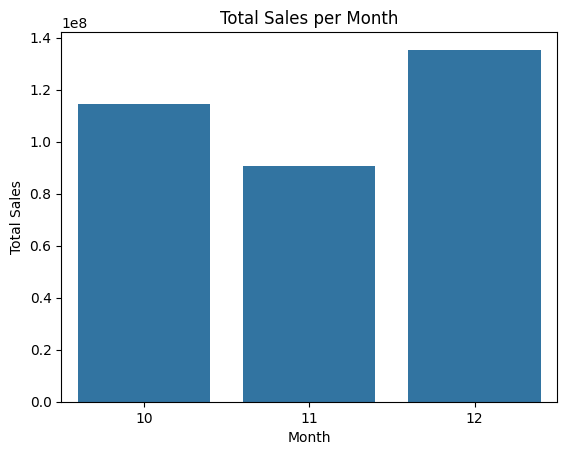

In [17]:
#plot monthly sales data using seaborn
sns.barplot(x=monthly_data.index, y='Sales', data=monthly_data)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.show()


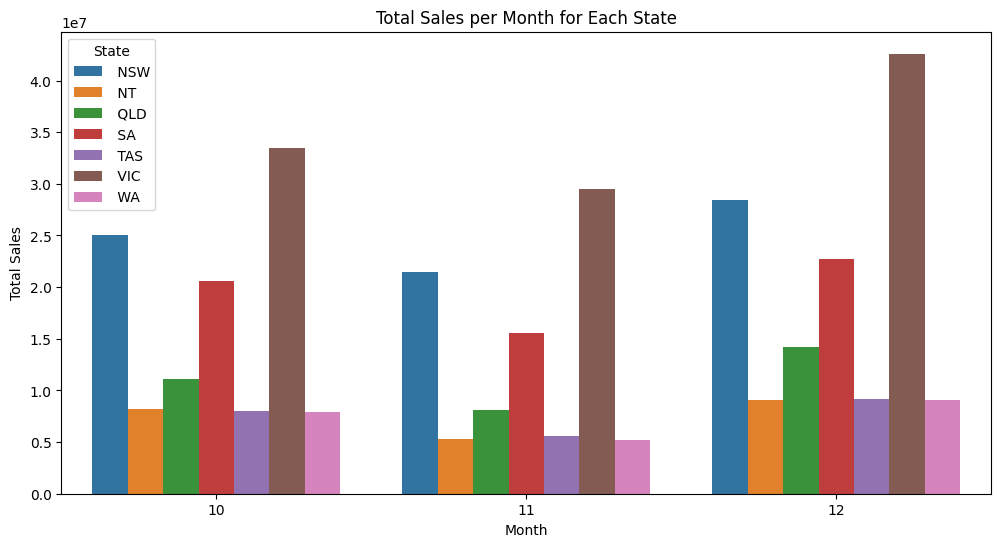

In [18]:

# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns for month and year
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Group by month, state, and perform aggregation if needed
monthly_state_data = df.groupby(['year', 'month', 'State']).agg({'Sales': 'sum', 'Date': 'mean'}).reset_index()

# Plotting using seaborn with 'state' as a third variable
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='Sales', hue='State', data=monthly_state_data)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month for Each State')
plt.show()



<Axes: xlabel='Date', ylabel='Sales'>

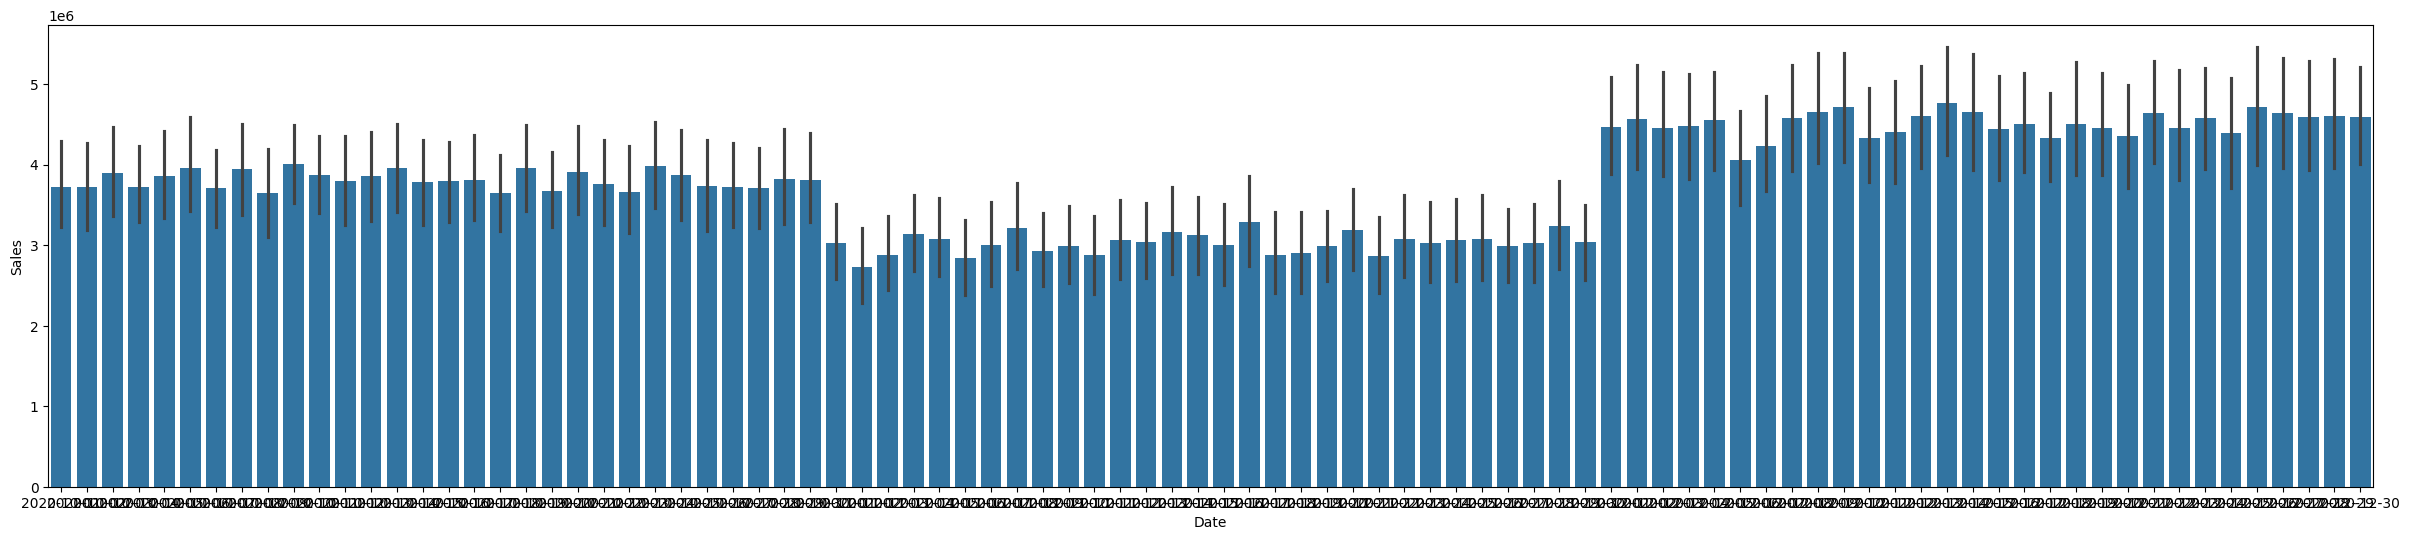

In [19]:
plt.figure(figsize=(30, 6))
sns.barplot(x='Date', y='Sales', data=df, estimator=sum)